# **1. Univariate Analysis**

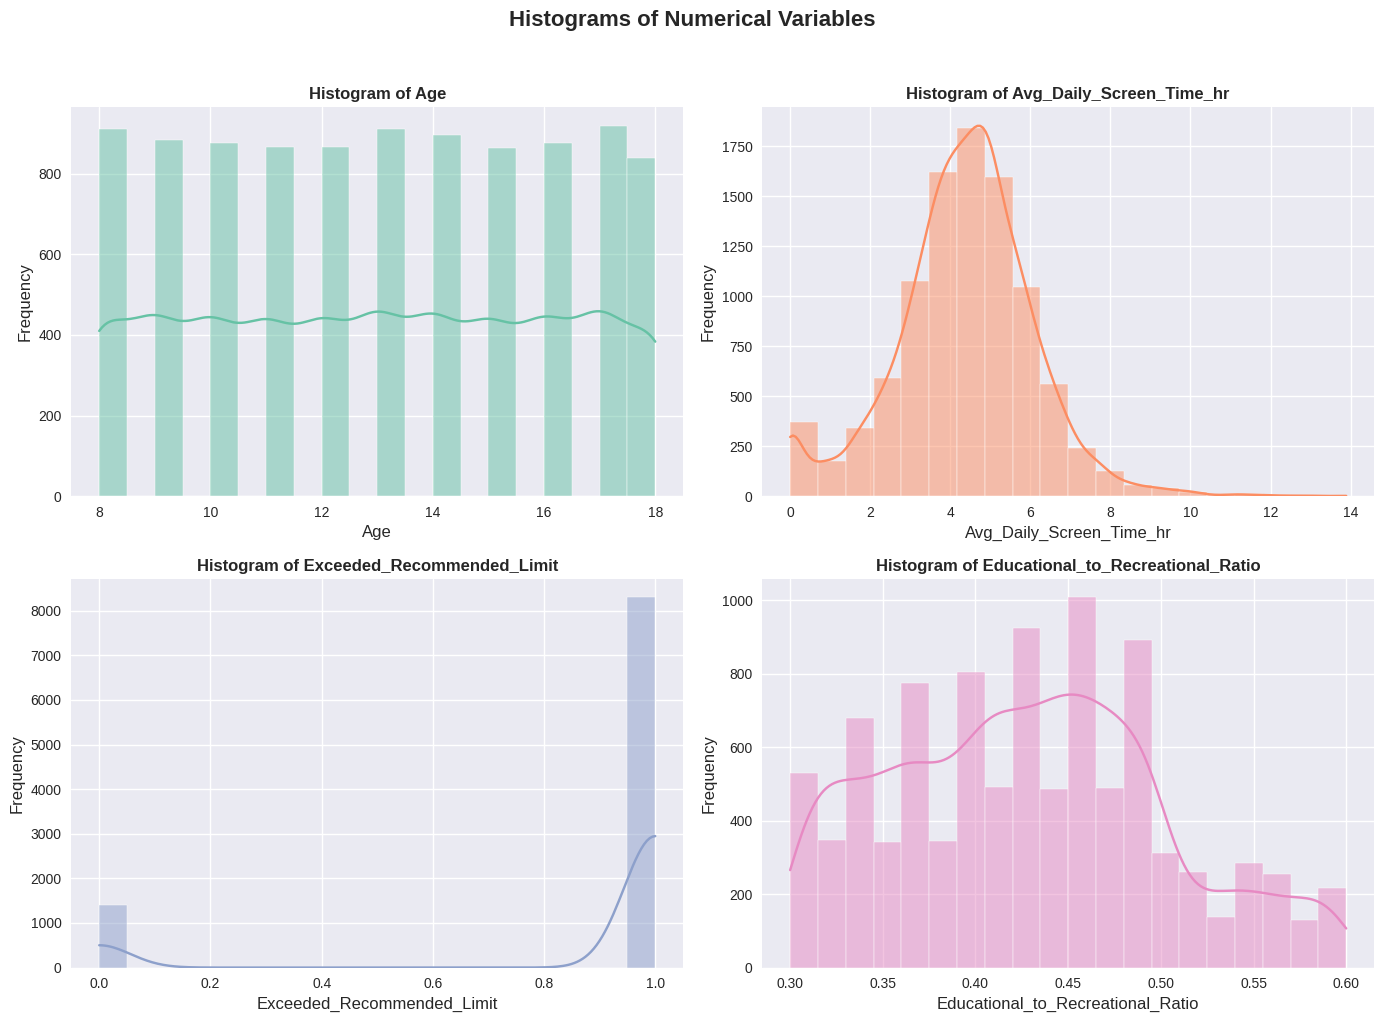

In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset
df = pd.read_csv("Indian_Kids_Screen_Time_Cleaned.csv")

# HISTOGRAMS
num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
rows = (len(num_cols) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, 5*rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color=sns.color_palette("Set2")[i % 8])
    axes[i].set_title(f"Histogram of {col}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.suptitle("Histograms of Numerical Variables", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

# Key Insights from Histograms :-

* Age: The most common age group is between 10–16 years. The average age is about 13 years, with the youngest being 8 and the oldest 18.

* Average Daily Screen Time (hours): Most kids spend 3.4 to 5.4 hours daily on screens. The average is 4.35 hours, with a maximum of almost 14 hours.

* Educational to Recreational Ratio: Most kids fall between a ratio of 0.37–0.48, showing that for every 1 hour of education, there are about 2 hours of recreation.

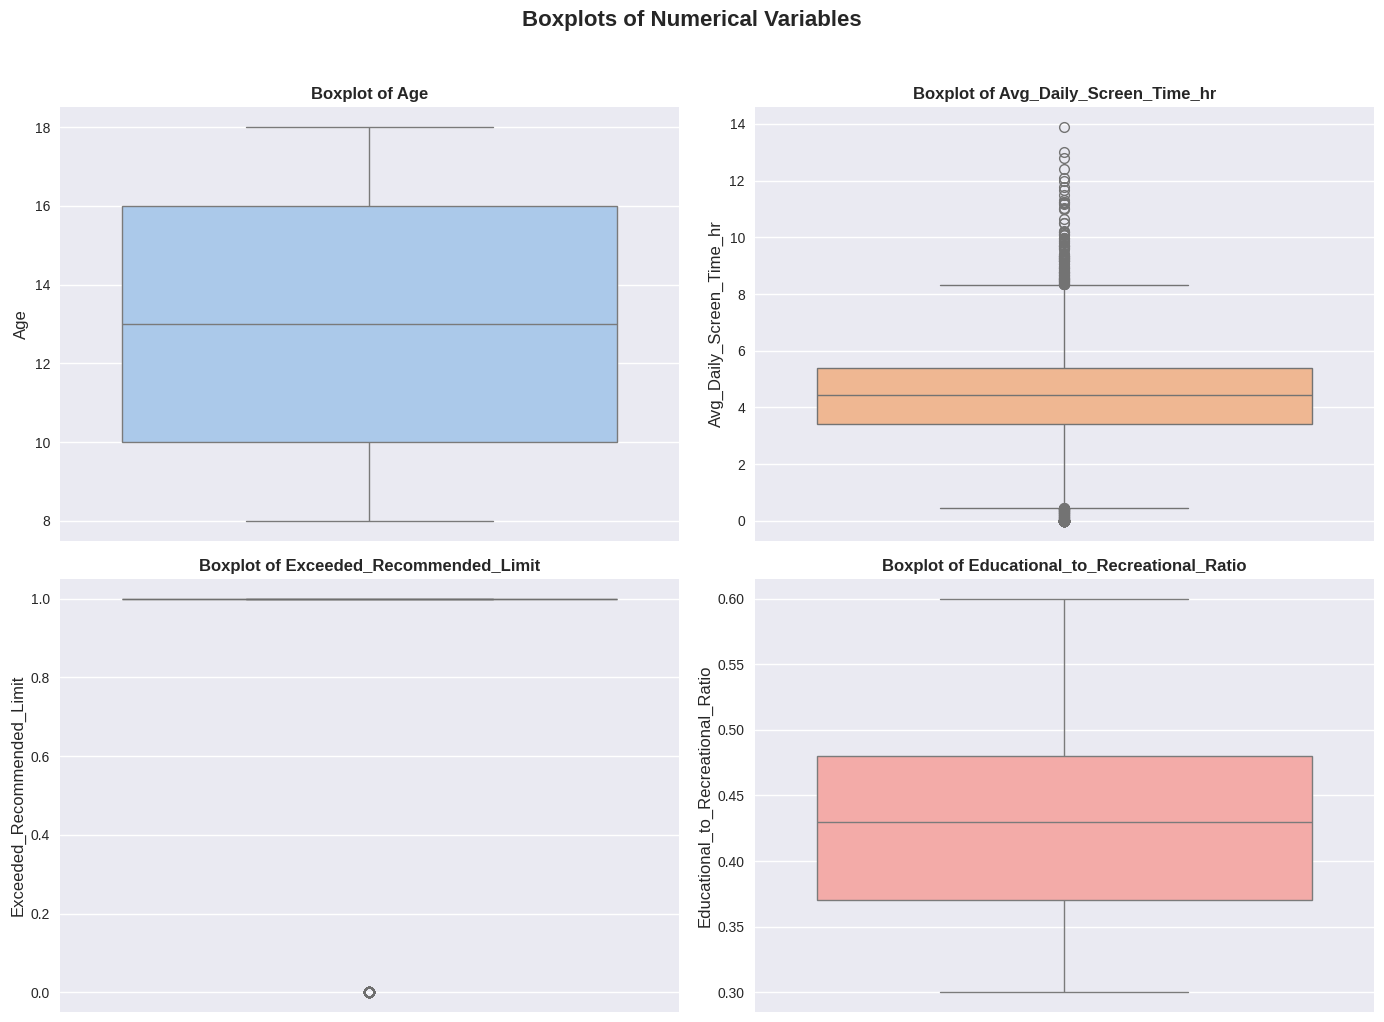

In [ ]:
# BOXPLOTS
rows = (len(num_cols) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, 5*rows))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i], color=sns.color_palette("pastel")[i % 8])
    axes[i].set_title(f"Boxplot of {col}", fontsize=12, fontweight="bold")
    axes[i].set_ylabel(col)
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.suptitle("Boxplots of Numerical Variables", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

## Key Insights from Boxplots

* The screen time distribution shows that while the majority are in the moderate range (3–5 hours), there are outliers spending 10+ hours per day.

* Age is spread fairly evenly between 8 and 18, with teenagers forming a large cluster.

* Educational-to-recreational ratio is narrowly distributed, with most children spending significantly more time on recreation than on education.

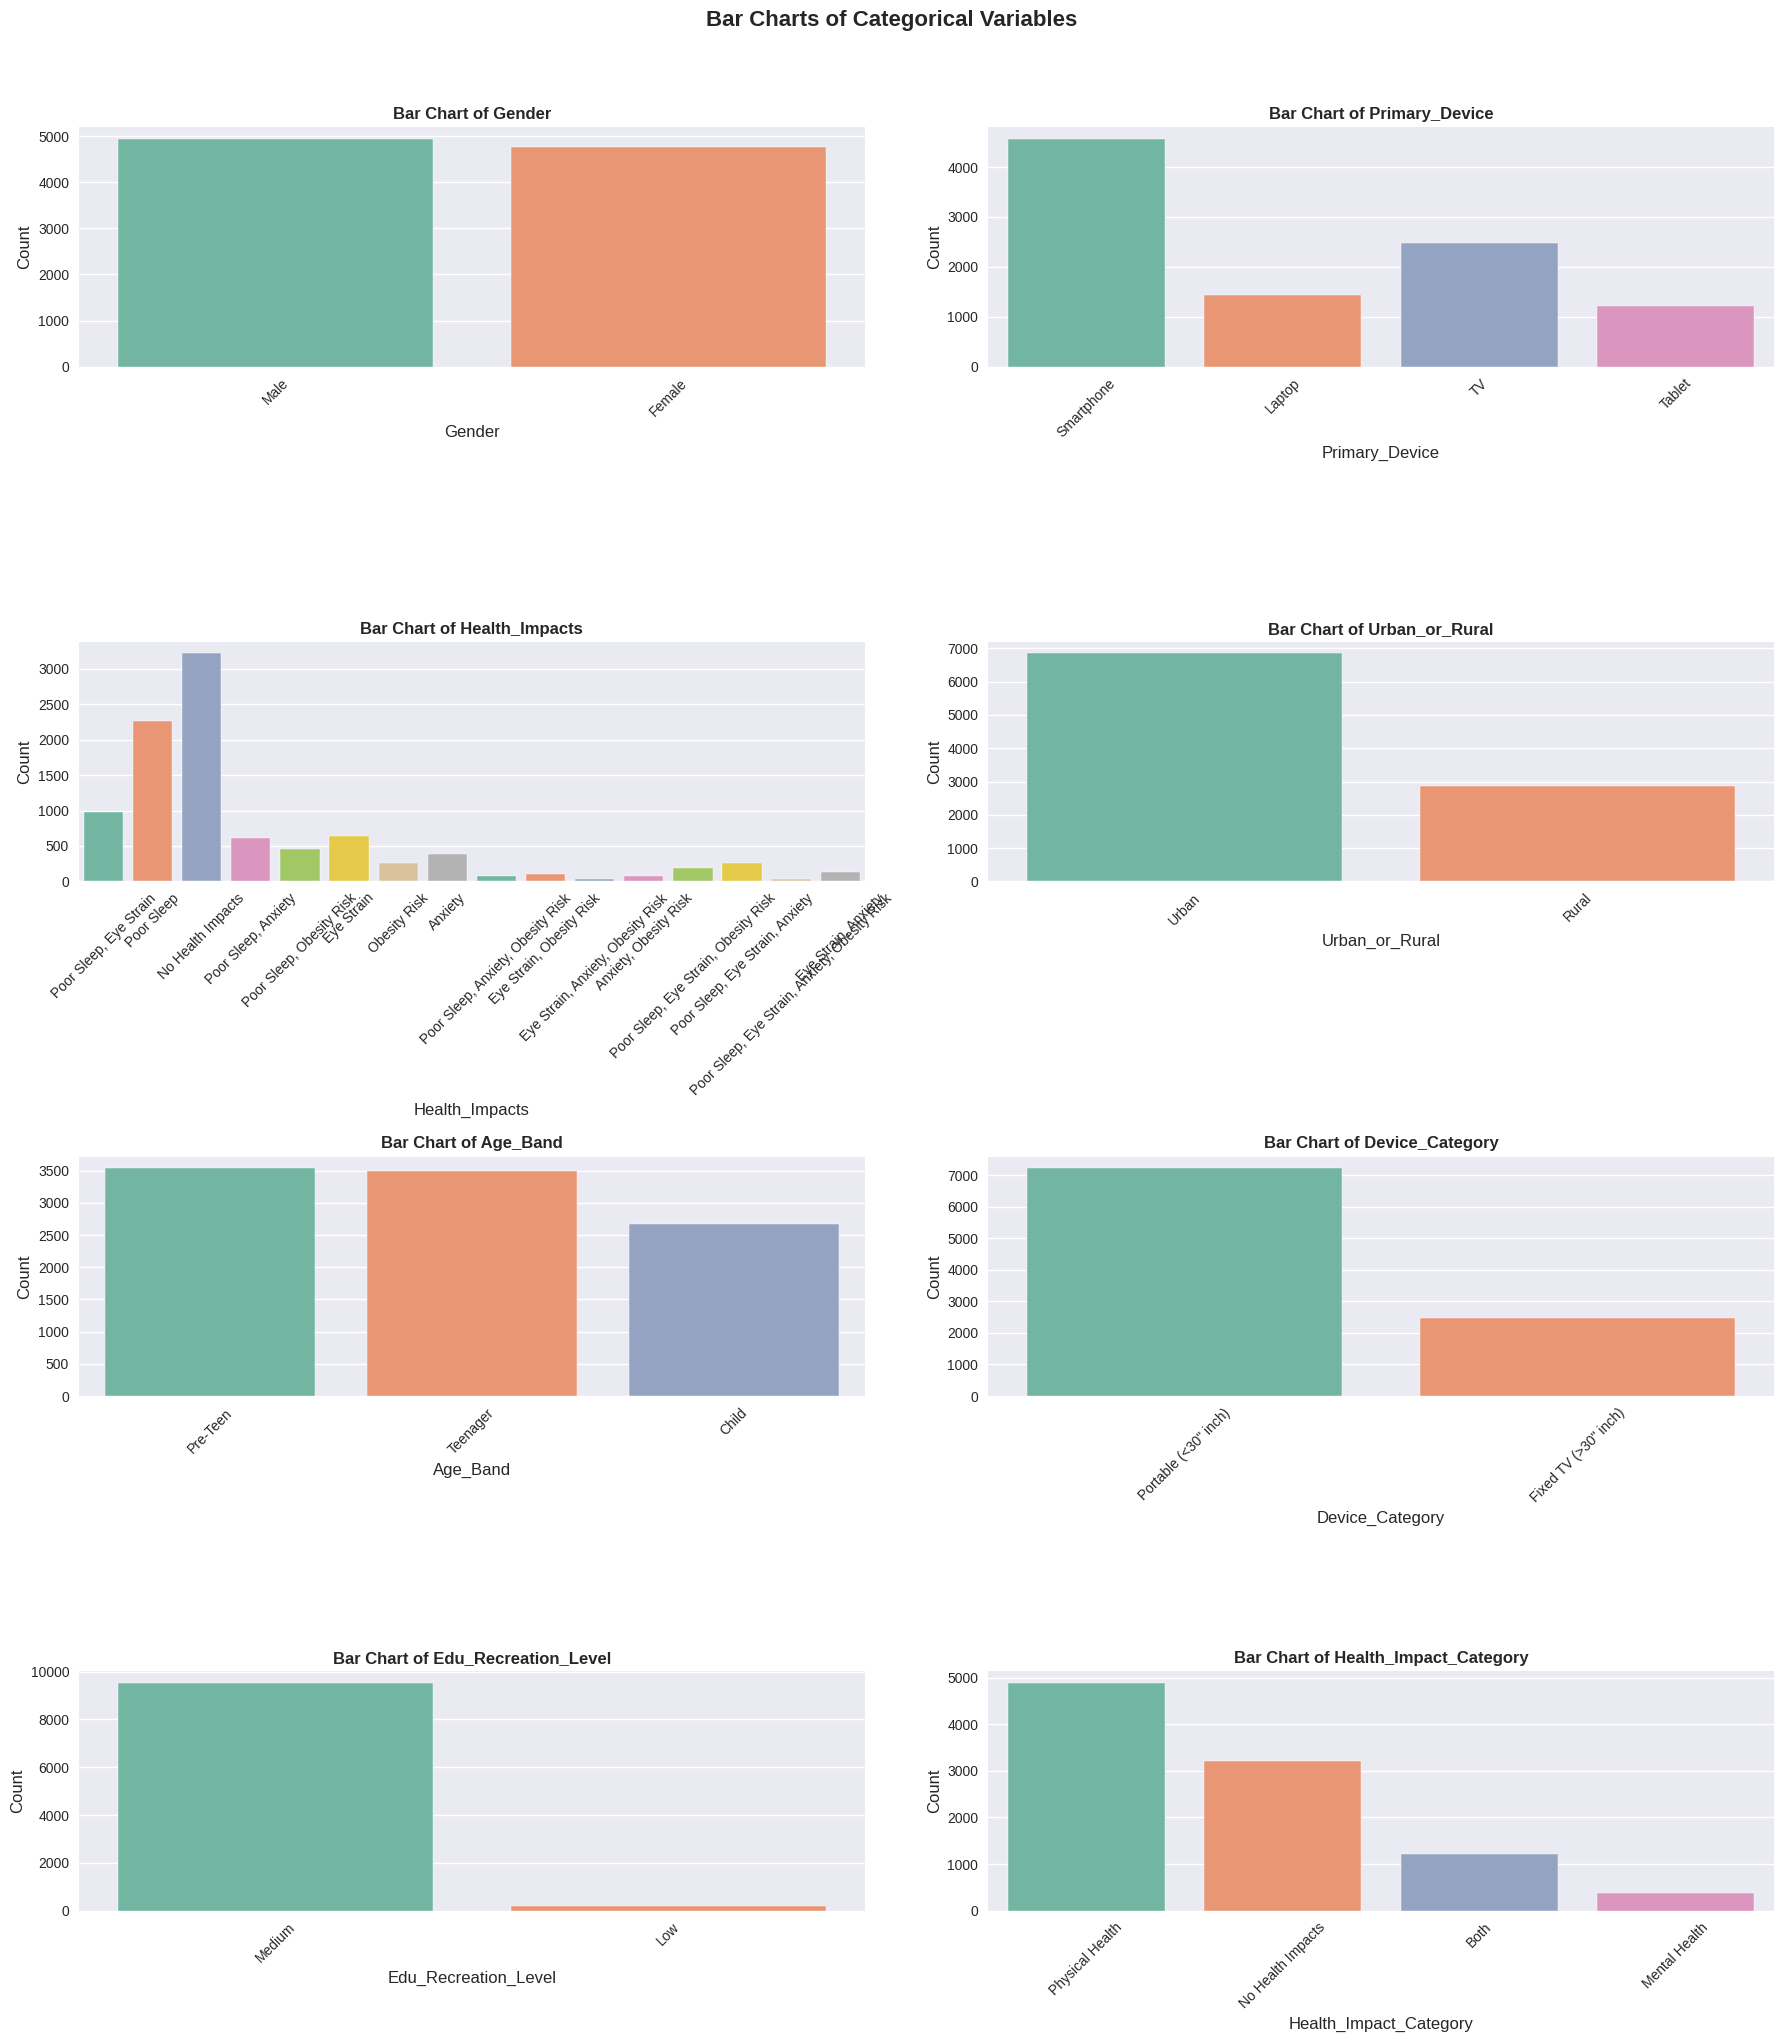

In [ ]:
# BAR CHARTS
cat_cols = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]
rows = (len(cat_cols) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(18, 5*rows))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="Set2", hue=col, legend=False)
    axes[i].set_title(f"Bar Chart of {col}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis="x", rotation=45)
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.suptitle("Bar Charts of Categorical Variables", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

## Key Insights from Bar Charts

* Gender: Males are slightly higher (4942 kids) compared to females (4770 kids).

* Primary Device: Smartphones lead with 4568 kids, while Tablets are least used with 1224 kids.

* Health Impacts: The most common case is “No Health Impacts” (3218 kids), while the least common is “Eye Strain, Anxiety, Obesity Risk” (35 kids).

* Urban or Rural: Urban kids dominate (6851), while Rural kids are fewer (2861).

* Age Band: Pre-Teens (3539 kids) are the largest group, while Children (2674 kids) are the smallest.

* Device Category: Portable devices (<30" screens) are dominant (7225 kids), while Fixed TVs (>30" screens) are used least (2487 kids).

* Education/Recreation Level: The majority fall in the Medium level (9528 kids), while Low level is rare (184 kids).

* Health Impact Category: Physical Health issues dominate (4889 kids), while Mental Health issues are least reported (385 kids).

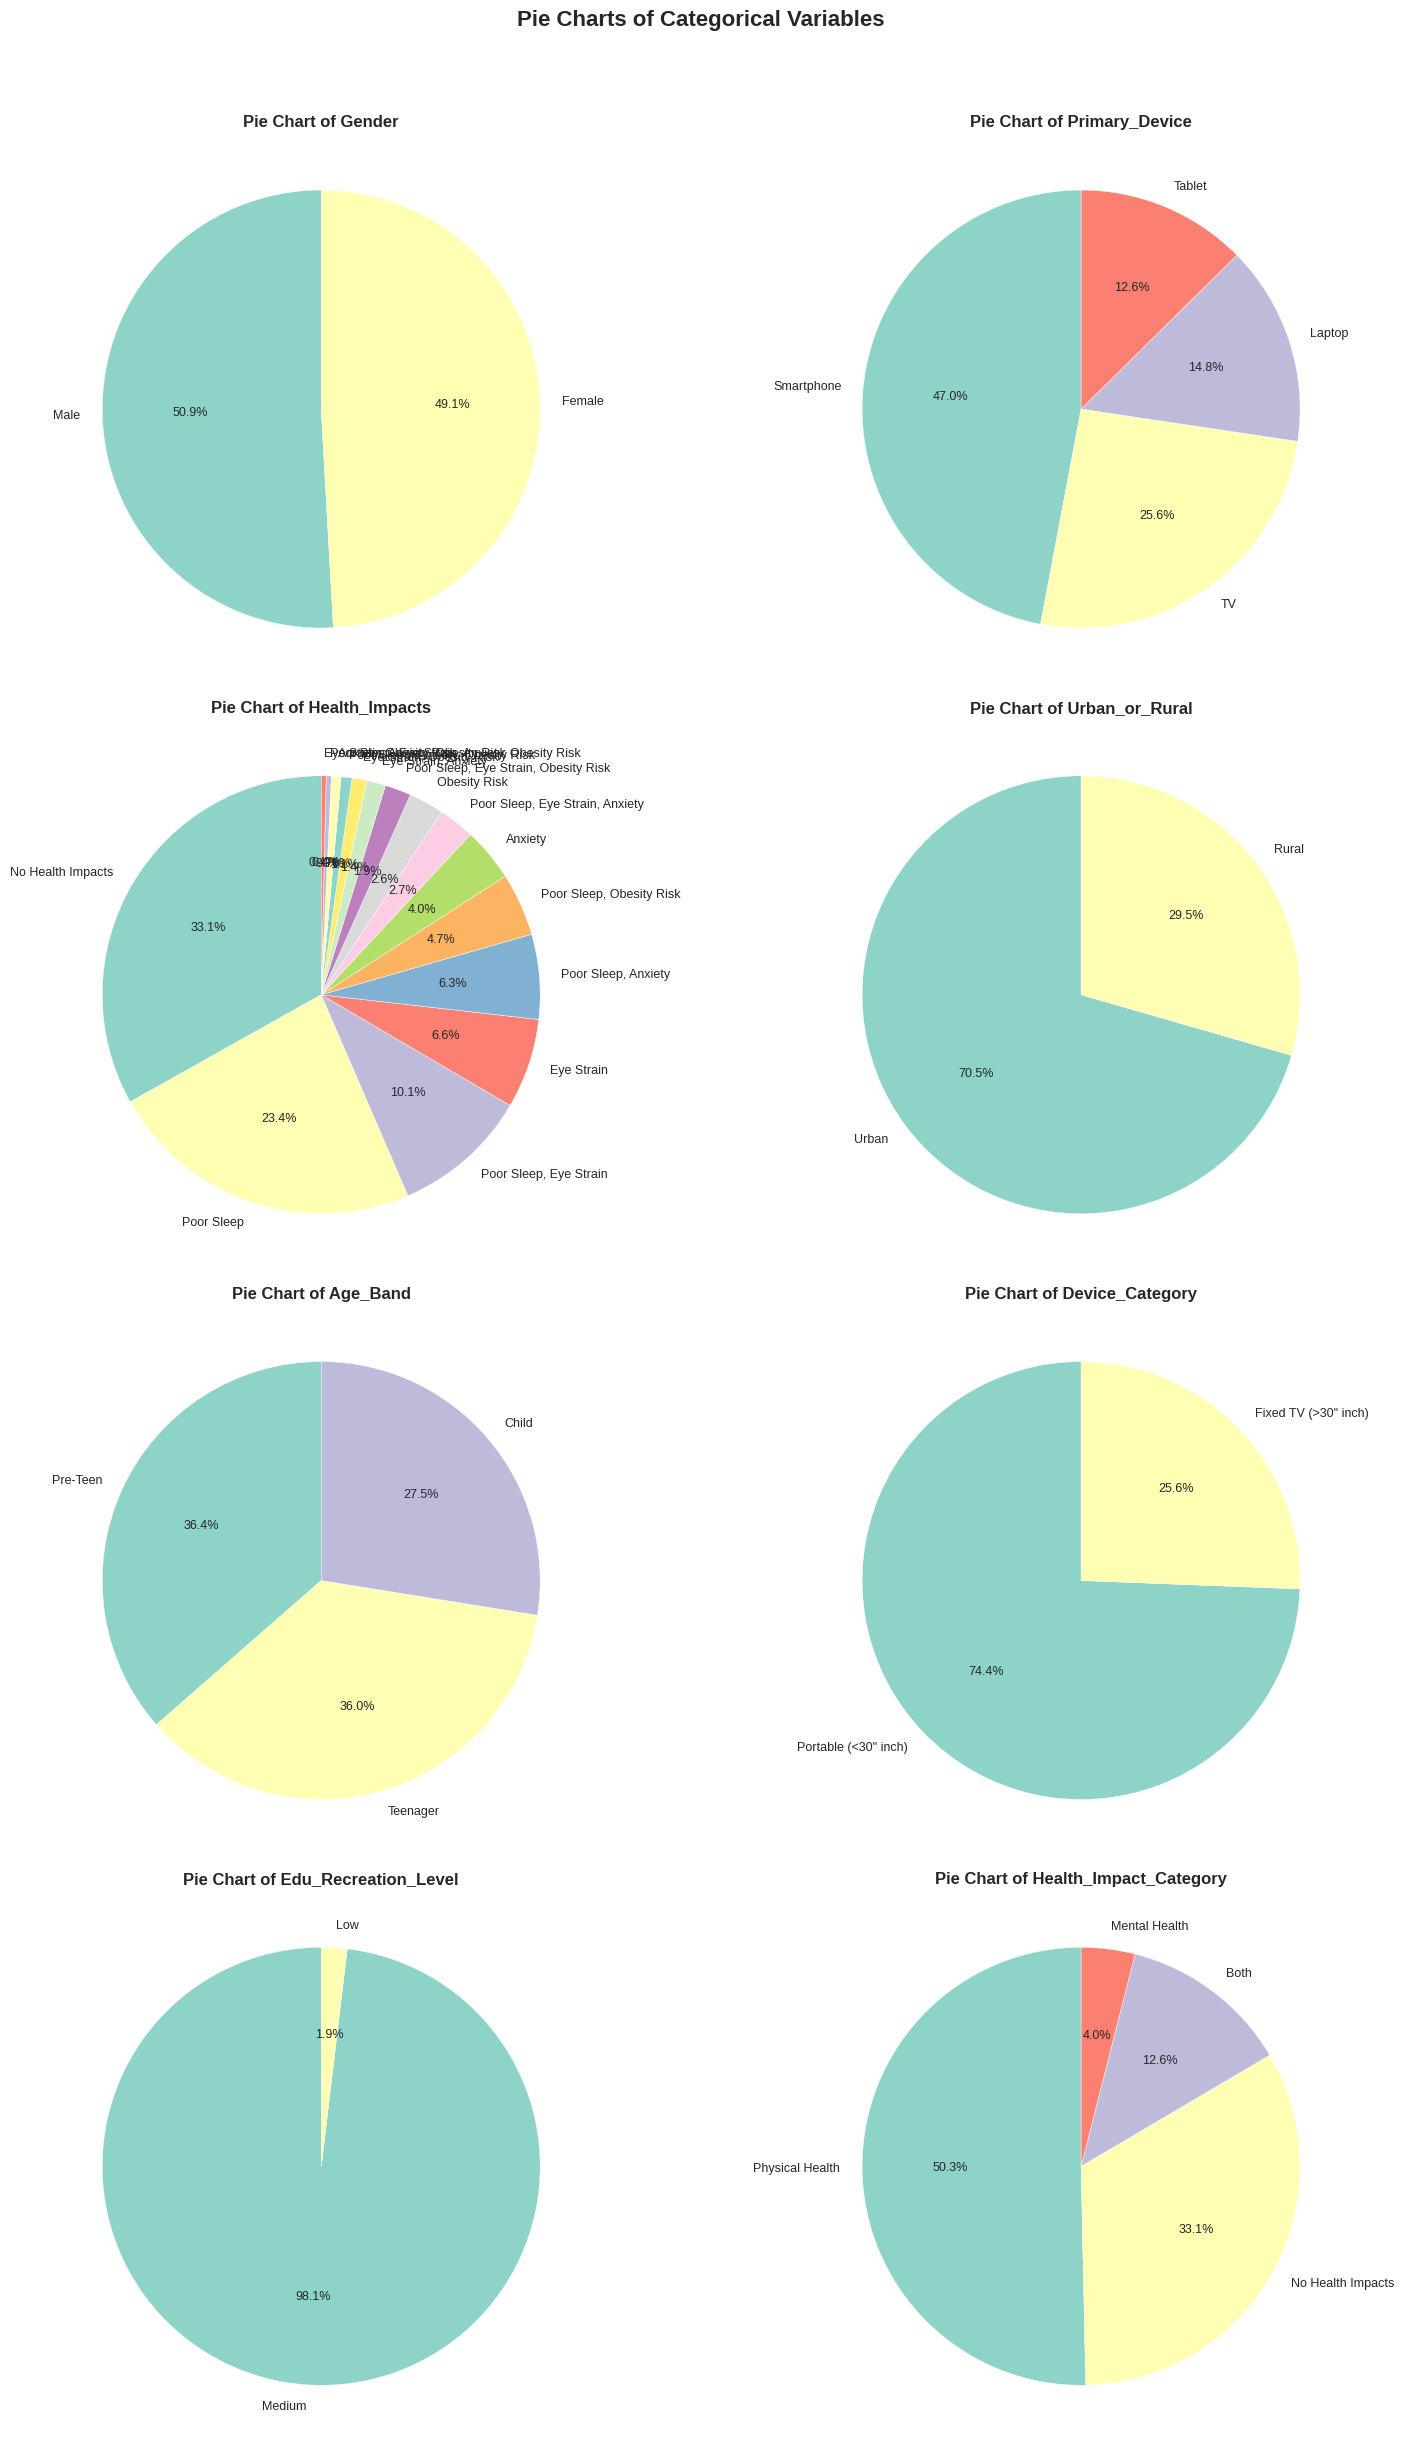

In [ ]:
# PIE CHARTS
rows = (len(cat_cols) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, 6*rows))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    df[col].value_counts().plot.pie(
        autopct="%1.1f%%", ax=axes[i], startangle=90,
        colors=sns.color_palette("Set3", len(df[col].unique())),
        textprops={"fontsize": 9}
    )
    axes[i].set_title(f"Pie Chart of {col}", fontsize=12, fontweight="bold")
    axes[i].set_ylabel("")
for j in range(i+1, len(axes)):
    axes[j].axis("off")
plt.suptitle("Pie Charts of Categorical Variables", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

## Key Insights from Pie Charts

* Gender distribution is fairly balanced but slightly male-dominated.

* Smartphones make up the largest slice of device use, far outweighing laptops, TVs, or tablets.

* Most kids are from Urban areas, highlighting a possible urban bias in screen time habits.

* Health impacts are concentrated on physical health problems, while mental health-only impacts are rare.

* Medium Edu/Recreation Level dominates strongly, with High and Low levels forming very small proportions.

# **2. Bivariate Analysis**

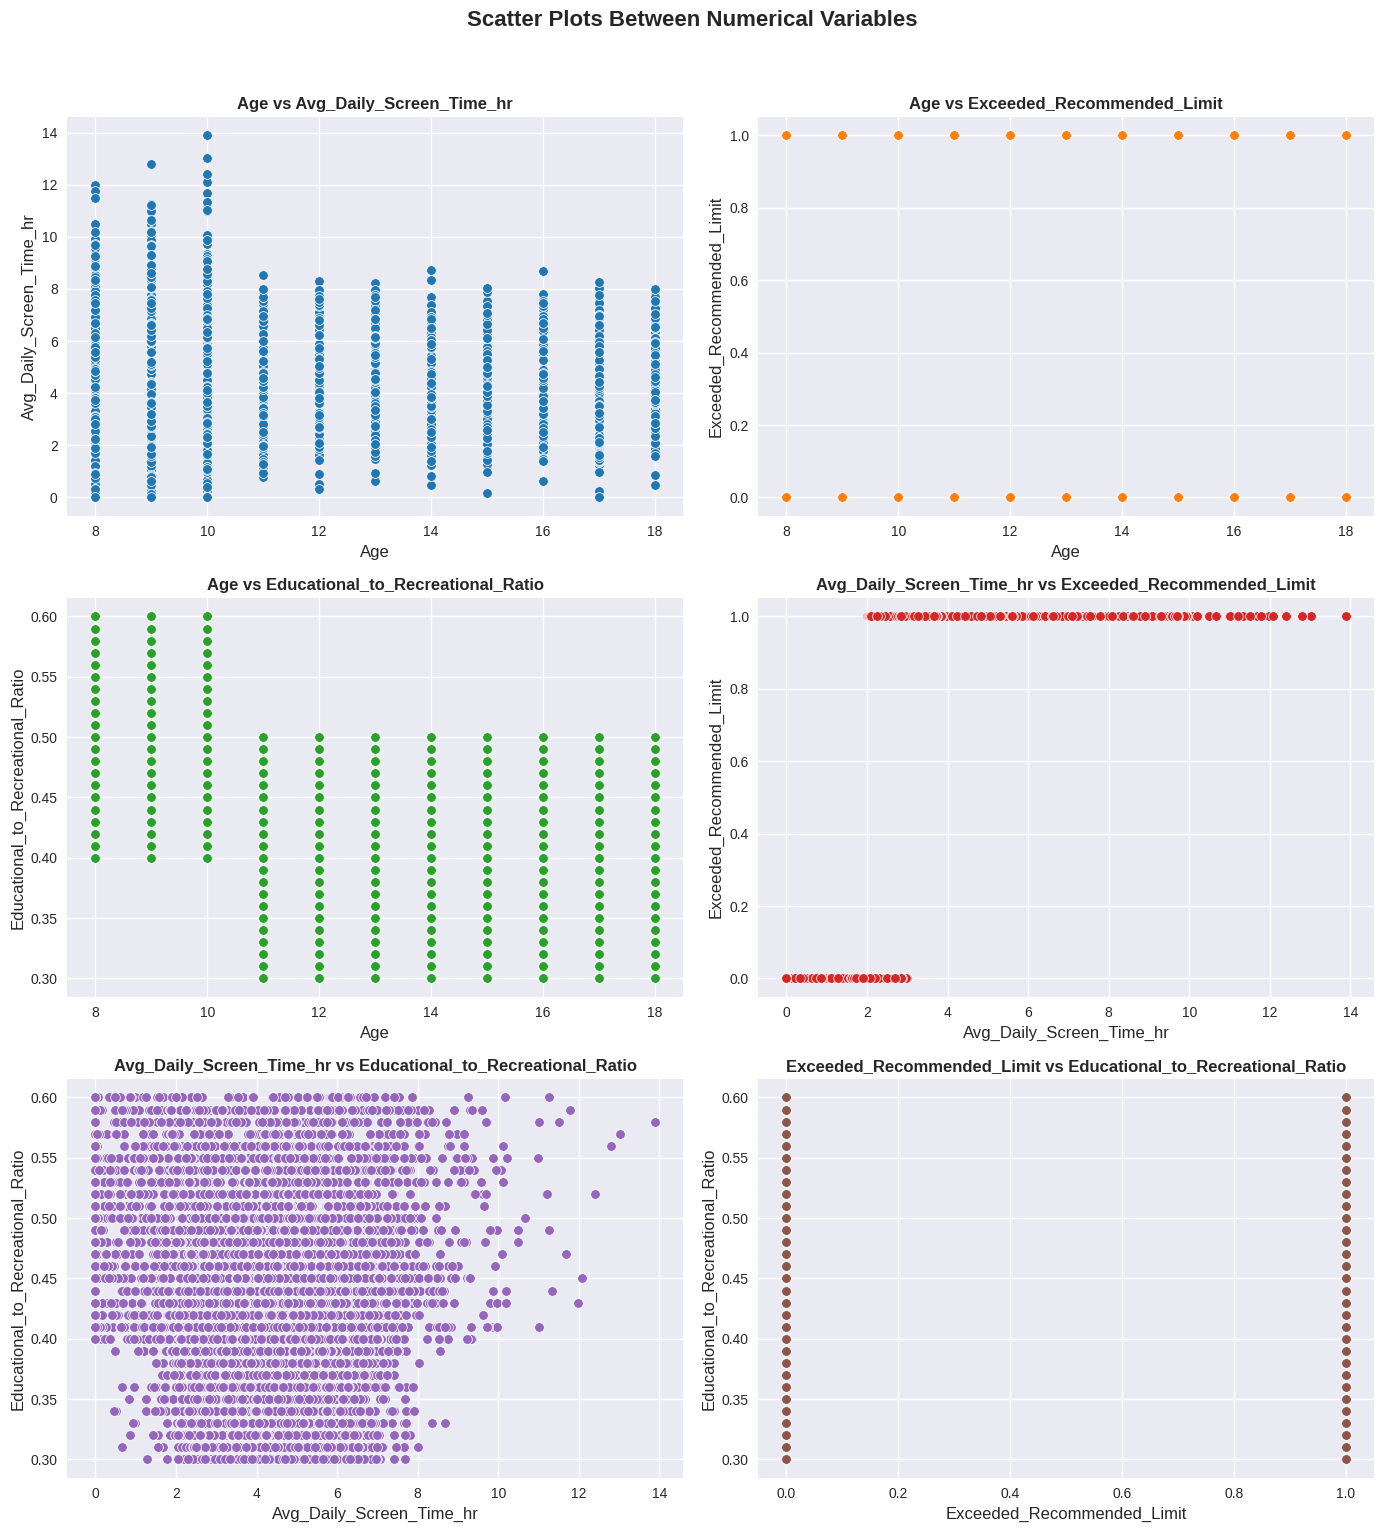

In [ ]:
# SCATTER PLOTS
from itertools import combinations

num_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
pairs = list(combinations(num_cols, 2))

rows = (len(pairs) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, 5*rows))
axes = axes.flatten()

for i, (x, y) in enumerate(pairs):
    sns.scatterplot(x=df[x], y=df[y], ax=axes[i], color=sns.color_palette("tab10")[i % 10])
    axes[i].set_title(f"{x} vs {y}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Scatter Plots Between Numerical Variables", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

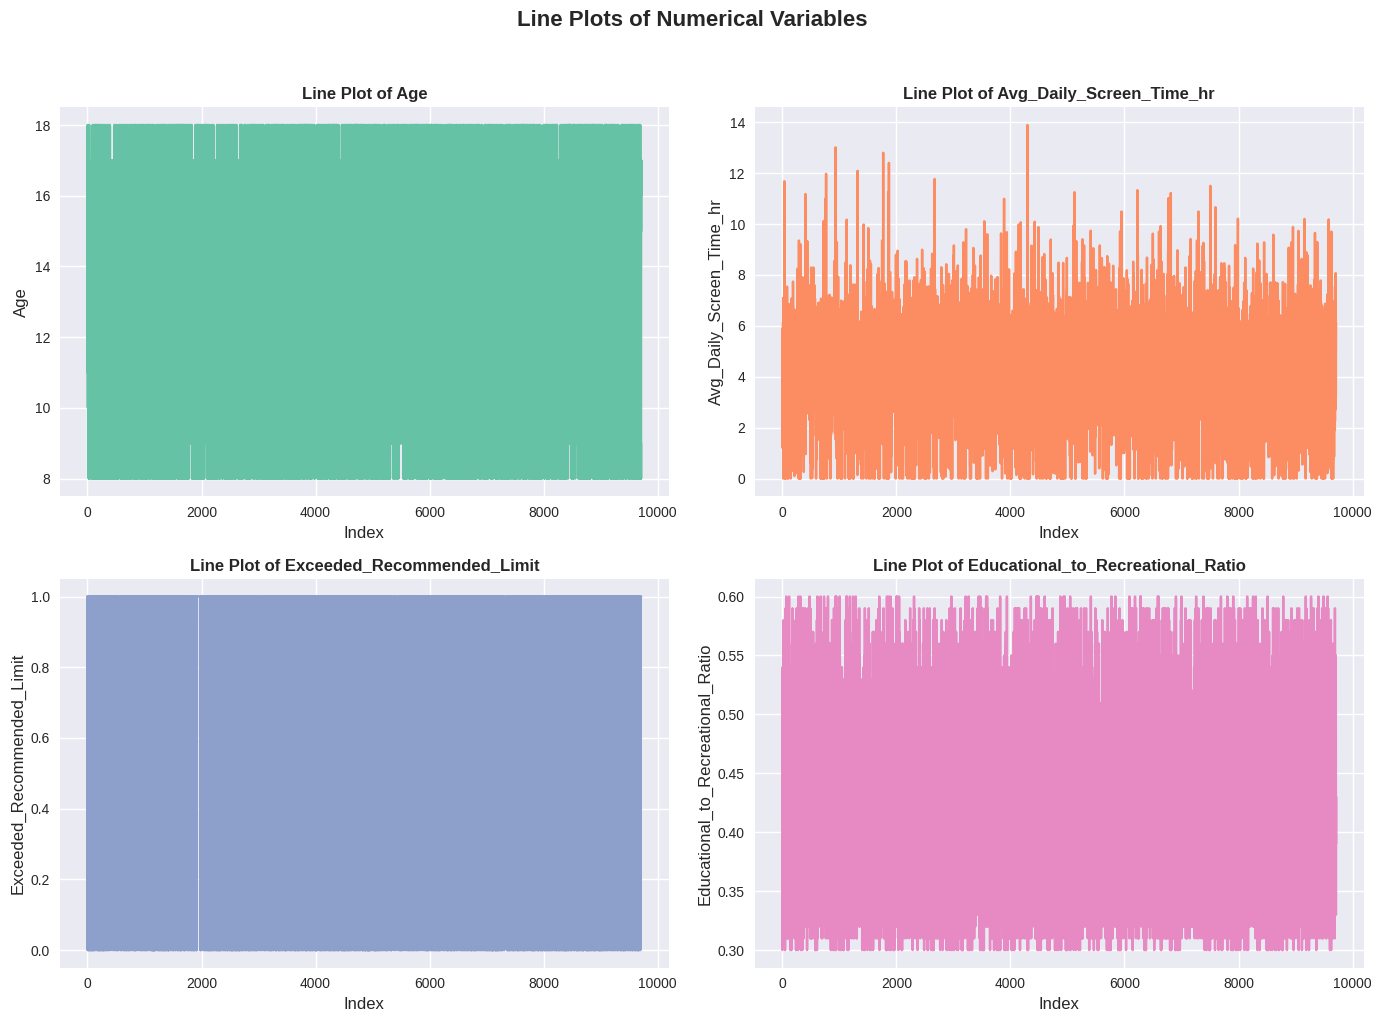

In [ ]:
# LINE PLOTS
rows = (len(num_cols) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(14, 5*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.lineplot(data=df[col], ax=axes[i], color=sns.color_palette("Set2")[i % 8])
    axes[i].set_title(f"Line Plot of {col}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel(col)

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Line Plots of Numerical Variables", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

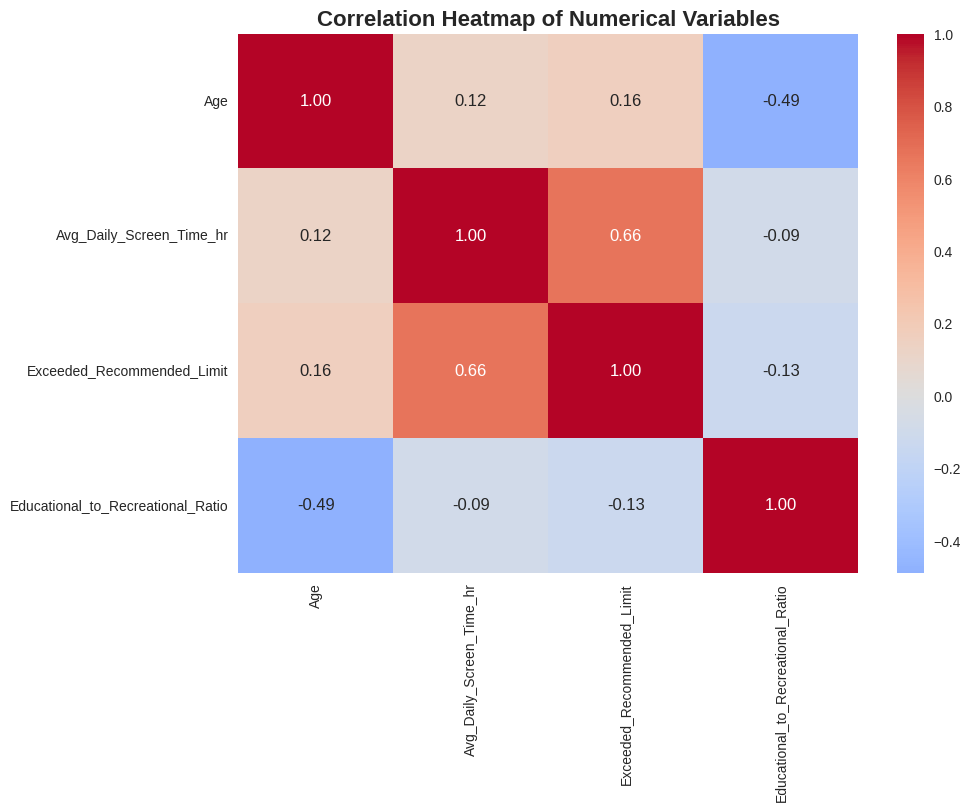

In [ ]:
# HEATMAP
plt.figure(figsize=(10, 7))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16, fontweight="bold")
plt.show()

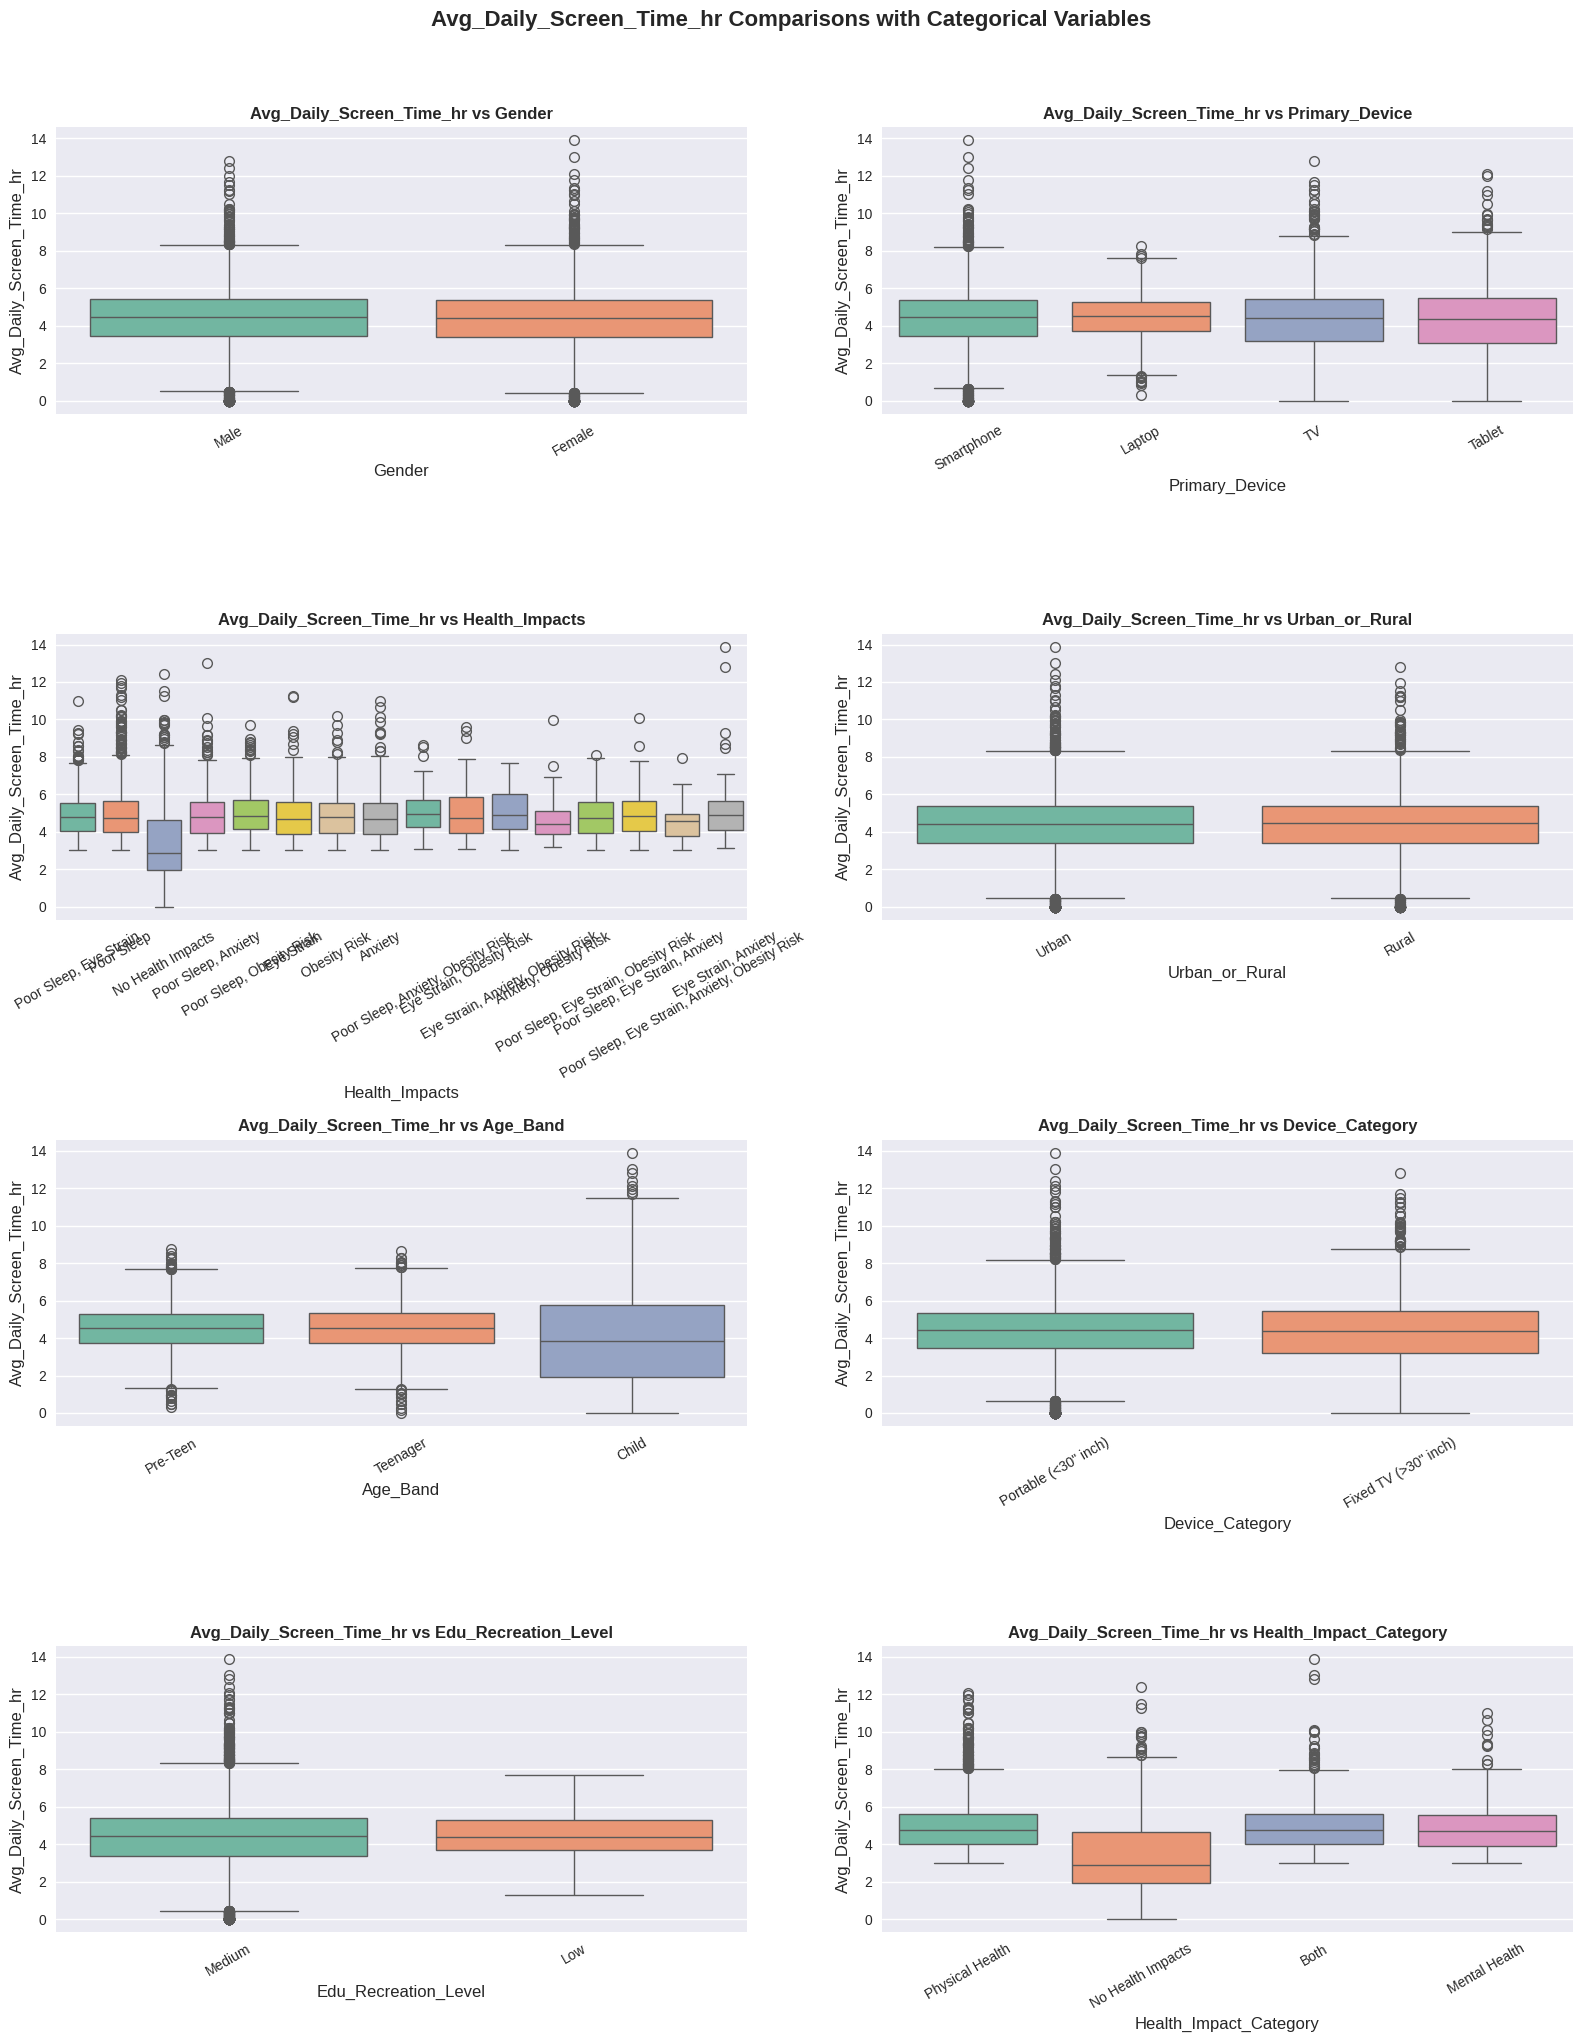

In [ ]:
# Grouped Comparisons: ScreenTime vs categorical features
rows = (len(cat_cols) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, 5*rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y="Avg_Daily_Screen_Time_hr", data=df, ax=axes[i], palette="Set2", hue=col, legend=False) # Explicitly set hue and remove legend
    axes[i].set_title(f"Avg_Daily_Screen_Time_hr vs {col}", fontsize=12, fontweight="bold")
    axes[i].tick_params(axis="x", rotation=30)

# Turn off unused axes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Avg_Daily_Screen_Time_hr Comparisons with Categorical Variables", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

## Key Insights from Bivariate Analysis

* Numerical Variables

  * Scatter plots show the spread and patterns between different numeric variables. Some pairs show weak or no visible relationship, while others may show upward or downward trends.

  * The correlation heatmap helps identify which variables move together. Positive values mean they increase together, while negative values mean one increases as the other decreases.

* Screen Time vs Categorical Features

  * Boxplots reveal how daily screen time differs across groups (e.g., gender, age group, school type).

  * Some categories show noticeably higher average screen time compared to others, suggesting that screen habits are influenced by demographic or lifestyle factors.

* Overall Takeaway

  * Screen time is not evenly distributed; it varies by both numeric and categorical factors.

  * Correlation analysis highlights which variables are closely related, which can be useful for deeper modeling or prediction later.